# LetsGrowMore Virtual Internship
## Data Science Internship Program (October 2021)
### Advance level task:- Develop A Neural Network That Can Read Handwriting
### Author:- Pratik Borle

### Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load the data

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#scale the data
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.9225
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9639
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9742
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9836
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9878
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9896
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

### Evaluate the test dataset 

In [8]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1414 - accuracy: 0.9777


[0.14139965176582336, 0.9776999950408936]

### Prediction 

In [9]:
predictions = model.predict(x_test_flat)

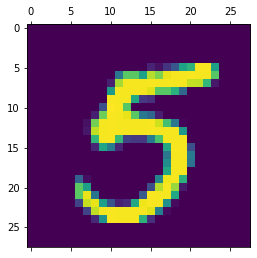

In [10]:
plt.matshow(x_test[356])

In [11]:
predictions[356]

array([6.2723028e-11, 4.6821353e-12, 2.0578152e-16, 3.0903161e-02,
       4.7702117e-20, 1.0000000e+00, 5.1814038e-09, 1.4640662e-12,
       1.5035570e-03, 1.4776886e-03], dtype=float32)

In [12]:
np.argmax(predictions[356])

5

### Generate Confusion Matrix 

In [13]:
pred_labels = [np.argmax(i) for i in predictions]

In [14]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=pred_labels)

Text(69.0, 0.5, 'Truth')

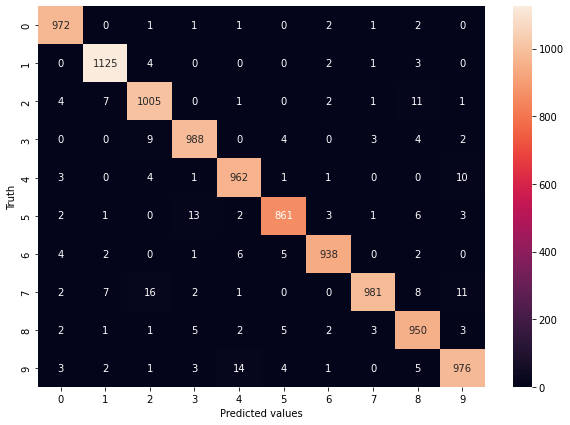

In [15]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Truth')

# Thank You